<a href="https://colab.research.google.com/github/nestorpalacios/MVP2/blob/main/MVP2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pós Graduação Ciência de Dados - PUC Rio - Julho 2023**
## MVP Sprint 2 - Machine Learning & Analytics
##*Deep Learning*

###Eng. Nestor A. A. Palacios Chun


## **1. INTRODUÇÃO**

Propõe-se usar um conjunto de dados kaggle público para validar um modelo de aprendizado profundo e ver se ele pode identificar imagens em movimento

## **2. DEFINIÇÃO DO PROBLEMA**

### **2.1 Qual é a descrição do problema?**

* Compreender entender a análise de Deep Learning.

### **2.2 Que premissas ou hipóteses você tem sobre o problema?**

* Com técnicas de deep learning podemos tentar prever o predicao do imagens en moviemnto.

### **2.4 Defina cada um dos atributos do dataset.**

* O conjunto de dados são imagens armazenadas no github, google colab e no ruat do conjunto de dados público.



DataSet:
https://www.kaggle.com/datasets/sshikamaru/car-object-detection

##**3. PREPARAÇAO DE DADOS**

### *3.1 Carregamento de bibliotecas usadas*

In [1]:
!git clone https://github.com/ultralytics/ultralytics.git

Cloning into 'ultralytics'...
remote: Enumerating objects: 13099, done.
remote: Counting objects: 100% (468/468), done.
remote: Compressing objects: 100% (374/374), done.
remote: Total 13099 (delta 149), reused 375 (delta 90), pack-reused 12631
Receiving objects: 100% (13099/13099), 7.84 MiB | 14.96 MiB/s, done.
Resolving deltas: 100% (8659/8659), done.


In [2]:
%cd /content/ultralytics

/content/ultralytics


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.6/607.6 kB 8.1 MB/s eta 0:00:00


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [9]:
import os
import random

import shutil

import numpy
import cv2
import pandas as pd

import yaml

from matplotlib import pyplot as plt
import IPython

### *3.2 Carga do Dataset*

In [10]:
# carga do dataset através de um arquivo

DIR = "/content/drive/MyDrive/Colab_Notebooks/MVP2/Data_MVP2_2"
IMAGES = DIR +"images/"
LABELS = DIR +"labels/"

SOURCE_IMAGES = "/content/drive/MyDrive/Colab_Notebooks/MVP2/Data_MVP2_2/Training_files"

In [11]:
labels = pd.read_csv("https://raw.githubusercontent.com/nestorpalacios/MVP2/main/Data_MVP2_2/train_solution_bounding_boxes.csv")
labels.head()

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422


In [12]:
# Mostra as dimensões do dataset
print(labels.shape)

(559, 5)


In [13]:
# as informações da tabela são exibidas
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   559 non-null    object 
 1   xmin    559 non-null    float64
 2   ymin    559 non-null    float64
 3   xmax    559 non-null    float64
 4   ymax    559 non-null    float64
dtypes: float64(4), object(1)
memory usage: 22.0+ KB


##4. MODELAGEM E TREINAMENTO

In [14]:
if not os.path.exists(IMAGES):
    os.makedirs(IMAGES)

for file in os.listdir(SOURCE_IMAGES):
    shutil.copy(os.path.join(SOURCE_IMAGES, file), IMAGES)

In [15]:
for _, row in labels.iterrows():

    image_file = row['image']
    class_id = "0"
    x = row['xmin']
    y = row['ymin']
    width = row['xmax'] - row['xmin']
    height = row['ymax'] - row['ymin']

    x_center = x + (width / 2)
    y_center = y + (height / 2)
    x_center /= 676
    y_center /= 380
    width /= 676
    height /= 380

    if not os.path.exists(LABELS):
        os.makedirs(LABELS)

    annotation_file = os.path.join(LABELS) + image_file.replace('.jpg', '.txt')

    with open(annotation_file, 'a') as ann_file:
        ann_file.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

In [16]:
data = {
    'path': DIR,
    'train': IMAGES,
    'val': IMAGES,
    'nc': 1,
    'names': ['car']
}


In [18]:
!ls

CITATION.cff	 docs	   MANIFEST.in	README.zh-CN.md   setup.py
CONTRIBUTING.md  examples  mkdocs.yml	requirements.txt  tests
docker		 LICENSE   README.md	setup.cfg	  ultralytics


In [23]:
with open(os.path.join("/content/", "data.yaml"), 'w') as file:
    yaml.dump(data, file)

In [20]:
%cd /content/
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source="/content/drive/MyDrive/Colab_Notebooks/MVP2/Data_MVP2_2/Training_files"

/content
Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

image 1/1001 /content/drive/MyDrive/Colab_Notebooks/MVP2/Data_MVP2_2/Training_files/vid_4_1000.jpg: 384x640 2 cars, 347.6ms
image 2/1001 /content/drive/MyDrive/Colab_Notebooks/MVP2/Data_MVP2_2/Training_files/vid_4_10000.jpg: 384x640 1 car, 161.1ms
image 3/1001 /content/drive/MyDrive/Colab_Notebooks/MVP2/Data_MVP2_2/Training_files/vid_4_10020.jpg: 384x640 1 car, 139.4ms
image 4/1001 /content/drive/MyDrive/Colab_Notebooks/MVP2/Data_MVP2_2/Training_files/vid_4_10040.jpg: 384x640 1 car, 153.6ms
image 5/1001 /content/drive/MyDrive/Colab_Notebooks/MVP2/Data_MVP2_2/Training_files/vid_4_10060.jpg: 384x640 1 car, 141.5ms
image 6/1001 /content/drive/MyDrive/Colab_Notebooks/MVP2/Data_MVP2_2/Training_files/vid_4_10080.jpg: 384x640 (no detections), 157.6ms
image 7/1001 /content/drive/MyDrive/Colab_Notebooks/MVP2/Data_MVP2_2/Training_files

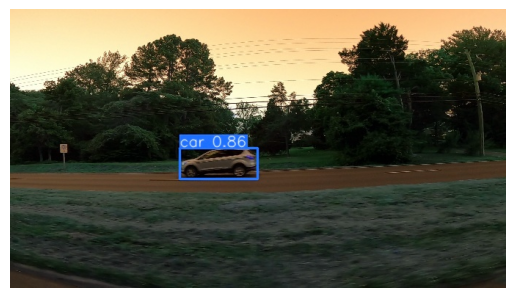

In [21]:
plt.axis('off')
plt.imshow(cv2.imread("/content/ultralytics/runs/detect/predict/vid_4_9980.jpg"))

##**5. AVALIAÇÃO DE RESULTADOS**

### 5.1 Observa-se que a hipótese foi validada, usando métodos de aprendizado de máquina, imagens em movimento podem ser identificadass.